In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle
import matplotlib

In [27]:
df = pd.read_csv("dataAnalystJobsIndia_7th_July_2024.csv")
df.head()

,Unnamed: 0,job_title,company,experience,min exp,max exp,salary,base salary,max salary,location,jobListed(days ago),postedIn,rating,reviews count,details,salary data provide by
0,0,JP Morgan Chase - Client Data Analyst (4-8 yrs),JP Morgan Chase,4-8 Yrs,4.0,8.0,NaN,NaN,NaN,Hyderabad / Secunderabad,3.0,iimjobs,4.1,5300.0,"Banking, KYC, Banking Operations",NaN
1,1,Data Analyst - Bangalore,Schneider Electric,5-10 Yrs,5.0,10.0,₹ 8 - 16L/yr,800000.0,1600000.0,"Bangalore / Bengaluru, Bangalore Rural",4.0,Naukri,4.2,3500.0,"ERP, SAP, Data Analysis",Salary Listed by Company
2,2,Senior IT ATLAS Data Analyst and Integration S...,SAP Labs India Pvt. Ltd.,7-11 Yrs,7.0,11.0,NaN,NaN,NaN,Bangalore / Bengaluru,7.0,Naukri,4.3,1500.0,"data quality, Data analysis, quality management",NaN
3,3,Consultant Data Analyst,Pfizer,2-6 Yrs,2.0,6.0,NaN,NaN,NaN,Mumbai,3.0,Naukri,4.1,1700.0,"Power Bi, Commercial Operations, Data Management",NaN
4,4,Senior Data Analyst - Retail Liabilities,IDFC FIRST Bank,5-10 Yrs,5.0,10.0,NaN,NaN,NaN,Mumbai,5.0,Naukri,4.5,2300.0,"Test strategy, Analytical, Manager Technology",NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1561 non-null   int64  
 1   job_title               1561 non-null   object 
 2   company                 1561 non-null   object 
 3   experience              1527 non-null   object 
 4   min exp                 1527 non-null   float64
 5   max exp                 1527 non-null   float64
 6   salary                  343 non-null    object 
 7   base salary             343 non-null    float64
 8   max salary              343 non-null    float64
 9   location                1528 non-null   object 
 10  jobListed(days ago)     1561 non-null   float64
 11  postedIn                1561 non-null   object 
 12  rating                  1124 non-null   float64
 13  reviews count           1124 non-null   float64
 14  details                 1528 non-null   

In [29]:
df.describe()

,Unnamed: 0,min exp,max exp,base salary,max salary,jobListed(days ago),rating,reviews count
count,1561.0000,1527.000000,1527.000000,3.430000e+02,3.430000e+02,1561.000000,1124.000000,1124.000000
mean,780.0000,3.131631,6.555337,5.649980e+05,1.859911e+06,223.814222,3.799377,959.846975
std,450.7662,2.191749,3.199266,6.992511e+05,2.018750e+06,650.077316,0.740237,4198.153851
min,0.0000,0.000000,1.000000,9.400000e+03,7.000000e+04,0.000000,1.000000,1.000000
25%,390.0000,2.000000,4.000000,1.650000e+05,7.000000e+05,16.000000,3.500000,7.000000
50%,780.0000,3.000000,6.000000,3.600000e+05,1.330000e+06,30.000000,3.900000,30.000000
75%,1170.0000,4.000000,8.000000,7.000000e+05,2.458500e+06,240.000000,4.200000,242.500000
max,1560.0000,15.000000,30.000000,9.000000e+06,2.250000e+07,19710.000000,5.000000,41400.000000


In [30]:
df = df.drop(['Unnamed: 0'],axis=1)

In [31]:
df.isnull().sum()

job_title                    0
company                      0
experience                  34
min exp                     34
max exp                     34
salary                    1218
base salary               1218
max salary                1218
location                    33
jobListed(days ago)          0
postedIn                     0
rating                     437
reviews count              437
details                     33
salary data provide by    1218
dtype: int64

<Axes: >

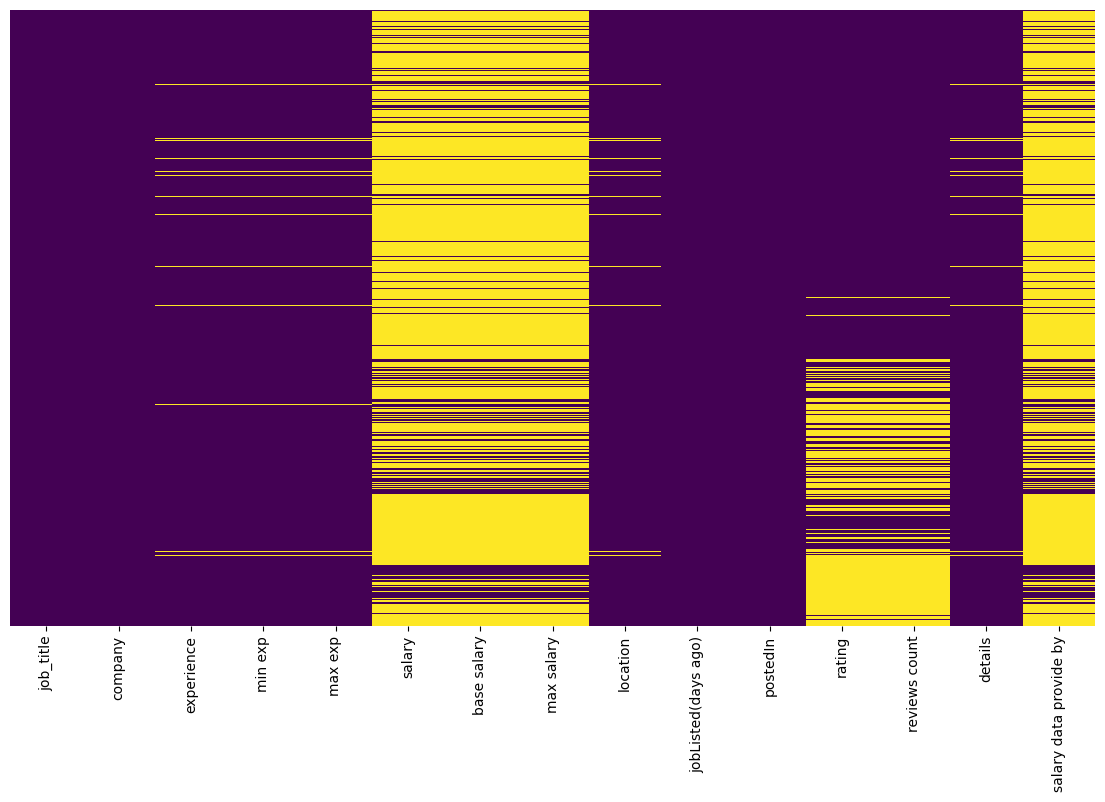

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [33]:
df['avg_exp'] = (df['min exp'] + df['max exp'])/2

In [34]:
df['avg_salary'] = (df['base salary'] + df['max salary'])/2

In [35]:
df.head()

,job_title,company,experience,min exp,max exp,salary,base salary,max salary,location,jobListed(days ago),postedIn,rating,reviews count,details,salary data provide by,avg_exp,avg_salary
0,JP Morgan Chase - Client Data Analyst (4-8 yrs),JP Morgan Chase,4-8 Yrs,4.0,8.0,NaN,NaN,NaN,Hyderabad / Secunderabad,3.0,iimjobs,4.1,5300.0,"Banking, KYC, Banking Operations",NaN,6.0,NaN
1,Data Analyst - Bangalore,Schneider Electric,5-10 Yrs,5.0,10.0,₹ 8 - 16L/yr,800000.0,1600000.0,"Bangalore / Bengaluru, Bangalore Rural",4.0,Naukri,4.2,3500.0,"ERP, SAP, Data Analysis",Salary Listed by Company,7.5,1200000.0
2,Senior IT ATLAS Data Analyst and Integration S...,SAP Labs India Pvt. Ltd.,7-11 Yrs,7.0,11.0,NaN,NaN,NaN,Bangalore / Bengaluru,7.0,Naukri,4.3,1500.0,"data quality, Data analysis, quality management",NaN,9.0,NaN
3,Consultant Data Analyst,Pfizer,2-6 Yrs,2.0,6.0,NaN,NaN,NaN,Mumbai,3.0,Naukri,4.1,1700.0,"Power Bi, Commercial Operations, Data Management",NaN,4.0,NaN
4,Senior Data Analyst - Retail Liabilities,IDFC FIRST Bank,5-10 Yrs,5.0,10.0,NaN,NaN,NaN,Mumbai,5.0,Naukri,4.5,2300.0,"Test strategy, Analytical, Manager Technology",NaN,7.5,NaN


In [36]:
df['avg_salary'] = df['avg_salary'].fillna(0).astype(int)

<Axes: xlabel='avg_salary', ylabel='avg_exp'>

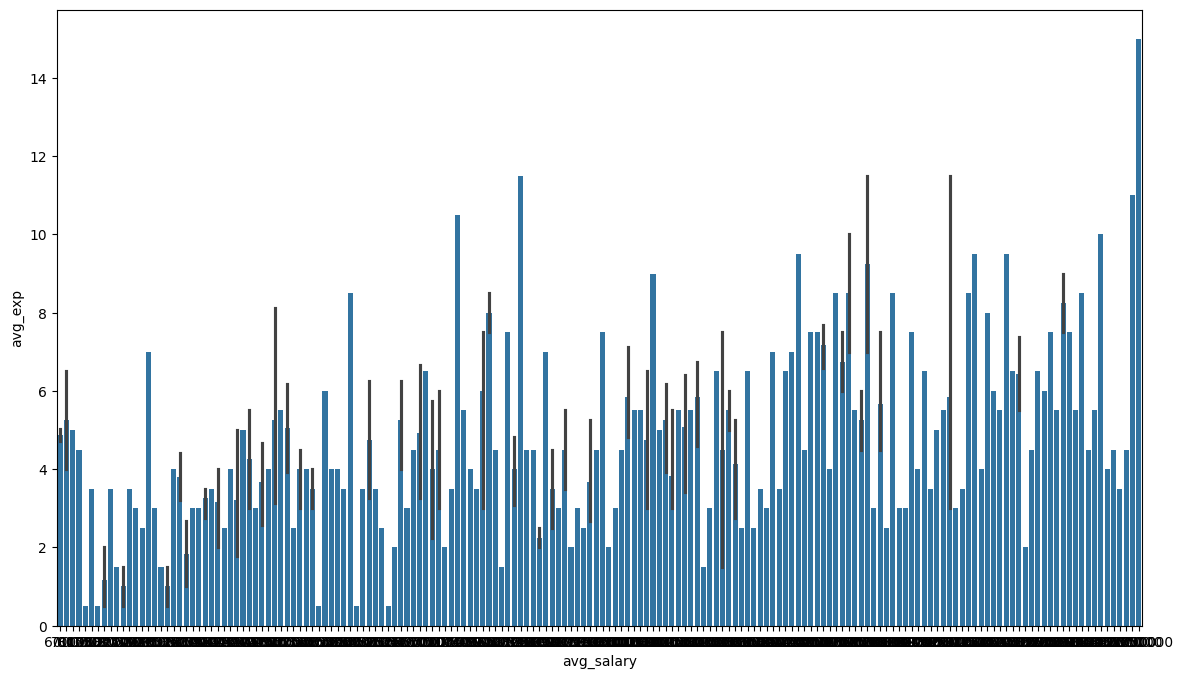

In [37]:
matplotlib.rcParams['figure.figsize'] = (14,8)
sns.barplot(x='avg_salary',y='avg_exp' , data=df)

In [38]:
df = df.drop(['min exp','max exp','base salary','max salary','salary'],axis=1)
df.head()

,job_title,company,experience,location,jobListed(days ago),postedIn,rating,reviews count,details,salary data provide by,avg_exp,avg_salary
0,JP Morgan Chase - Client Data Analyst (4-8 yrs),JP Morgan Chase,4-8 Yrs,Hyderabad / Secunderabad,3.0,iimjobs,4.1,5300.0,"Banking, KYC, Banking Operations",NaN,6.0,0
1,Data Analyst - Bangalore,Schneider Electric,5-10 Yrs,"Bangalore / Bengaluru, Bangalore Rural",4.0,Naukri,4.2,3500.0,"ERP, SAP, Data Analysis",Salary Listed by Company,7.5,1200000
2,Senior IT ATLAS Data Analyst and Integration S...,SAP Labs India Pvt. Ltd.,7-11 Yrs,Bangalore / Bengaluru,7.0,Naukri,4.3,1500.0,"data quality, Data analysis, quality management",NaN,9.0,0
3,Consultant Data Analyst,Pfizer,2-6 Yrs,Mumbai,3.0,Naukri,4.1,1700.0,"Power Bi, Commercial Operations, Data Management",NaN,4.0,0
4,Senior Data Analyst - Retail Liabilities,IDFC FIRST Bank,5-10 Yrs,Mumbai,5.0,Naukri,4.5,2300.0,"Test strategy, Analytical, Manager Technology",NaN,7.5,0


In [39]:
df = df.drop(['experience'],axis=1)
df = df.drop(['jobListed(days ago)','salary data provide by','details'],axis=1)

In [40]:
df.head()

,job_title,company,location,postedIn,rating,reviews count,avg_exp,avg_salary
0,JP Morgan Chase - Client Data Analyst (4-8 yrs),JP Morgan Chase,Hyderabad / Secunderabad,iimjobs,4.1,5300.0,6.0,0
1,Data Analyst - Bangalore,Schneider Electric,"Bangalore / Bengaluru, Bangalore Rural",Naukri,4.2,3500.0,7.5,1200000
2,Senior IT ATLAS Data Analyst and Integration S...,SAP Labs India Pvt. Ltd.,Bangalore / Bengaluru,Naukri,4.3,1500.0,9.0,0
3,Consultant Data Analyst,Pfizer,Mumbai,Naukri,4.1,1700.0,4.0,0
4,Senior Data Analyst - Retail Liabilities,IDFC FIRST Bank,Mumbai,Naukri,4.5,2300.0,7.5,0


In [41]:
import plotly.express as px
px.histogram(df, x = 'avg_exp', y = 'avg_salary', histfunc='avg', range_x = [0, 14], range_y = [0, 1000000], title = 'experience vs salary')

In [47]:
import plotly.express as px
px.histogram(df, x = 'location', y = 'avg_salary', histfunc='avg', range_x = [0, 25], range_y = [0, 2000000], title = 'experience vs salary')

In [43]:
# Correctly assign 'Other countries' to locations with avg_salary less than or equal to 300,000
df.loc[df['avg_salary'] < 600000, 'location'] = 'Other countries'

# Create a pie chart
fig = px.pie(df, values='avg_salary', names='location', title='High paying salary state')

# Update the layout to make the figure smaller
fig.update_layout(
    width=600,  # Set the width of the figure
    height=400  # Set the height of the figure
)

# Update the pie chart to display percentages
fig.update_traces(textinfo='percent+label', textfont_size=12)

# Show the plot
fig.show()

In [48]:
df_pune = df[df['location'] == 'Pune']
# Create a line chart
fig = px.line(df_pune, x="avg_salary", y="avg_exp", title='Condition of Pune')
# Show the plot
fig.show()

In [61]:
df.loc[df['rating'] > 4.1, 'job_title'] = 'Other countries'

# Create a pie chart
fig = px.pie(df, values='rating', names='job_title', title='Job vs Rating')

# Update the layout to make the figure smaller
fig.update_layout(
    width=600,  # Set the width of the figure
    height=400  # Set the height of the figure
)

# Show the plot
fig.show()

In [ ]:
df = df.drop(['experience'],axis=1)
df.isnull().sum()

KeyError: "['experience'] not found in axis"

In [ ]:
df = df.drop(['location'],axis=1)

In [ ]:
## onehot encode geography
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo = OneHotEncoder()
geo_encoder = onehot_encoder_geo.fit_transform(df[['postedIn']])
geo_encoder

<1561x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1561 stored elements in Compressed Sparse Row format>

In [ ]:
onehot_encoder_geo.get_feature_names_out(['postedIn'])

array(['postedIn_First Naukri', 'postedIn_Naukri', 'postedIn_bigshyft',
       'postedIn_hirist', 'postedIn_iimjobs'], dtype=object)

In [ ]:
geo_encoded_df = pd.DataFrame(geo_encoder.toarray(),columns=onehot_encoder_geo.get_feature_names_out(['postedIn']))
geo_encoded_df

,postedIn_First Naukri,postedIn_Naukri,postedIn_bigshyft,postedIn_hirist,postedIn_iimjobs
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1556,0.0,1.0,0.0,0.0,0.0
1557,0.0,1.0,0.0,0.0,0.0
1558,0.0,1.0,0.0,0.0,0.0
1559,0.0,1.0,0.0,0.0,0.0


In [ ]:
## combine one hot encoder coloumns with the original data
df = pd.concat([df.drop('postedIn',axis=1),geo_encoded_df],axis=1)

In [ ]:
df.head()

,job_title,company,jobListed(days ago),rating,details,salary data provide by,avg_exp,avg_salary,postedIn_First Naukri,postedIn_Naukri,postedIn_bigshyft,postedIn_hirist,postedIn_iimjobs
0,JP Morgan Chase - Client Data Analyst (4-8 yrs),JP Morgan Chase,3.0,4.1,"Banking, KYC, Banking Operations",NaN,6.0,NaN,0.0,0.0,0.0,0.0,1.0
1,Data Analyst - Bangalore,Schneider Electric,4.0,4.2,"ERP, SAP, Data Analysis",Salary Listed by Company,7.5,1200000.0,0.0,1.0,0.0,0.0,0.0
2,Senior IT ATLAS Data Analyst and Integration S...,SAP Labs India Pvt. Ltd.,7.0,4.3,"data quality, Data analysis, quality management",NaN,9.0,NaN,0.0,1.0,0.0,0.0,0.0
3,Consultant Data Analyst,Pfizer,3.0,4.1,"Power Bi, Commercial Operations, Data Management",NaN,4.0,NaN,0.0,1.0,0.0,0.0,0.0
4,Senior Data Analyst - Retail Liabilities,IDFC FIRST Bank,5.0,4.5,"Test strategy, Analytical, Manager Technology",NaN,7.5,NaN,0.0,1.0,0.0,0.0,0.0


In [ ]:
##Company endoing
onehot_encoder_cmp = OneHotEncoder()
cmp_encoder = onehot_encoder_cmp.fit_transform(df[['company']])
cmp_encoder
onehot_encoder_cmp.get_feature_names_out(['company'])

array(['company_3Di Systems', 'company_4Bell Technology',
       'company_4CRisk.ai', ..., 'company_upGrad', 'company_upgrad',
       'company_wilatons'], dtype=object)

In [ ]:
geo_encoded_df = pd.DataFrame(cmp_encoder.toarray(),columns=onehot_encoder_cmp.get_feature_names_out(['company']))
geo_encoded_df

,company_3Di Systems,company_4Bell Technology,company_4CRisk.ai,company_500 Apps,company_99Plus IT Solutions,company_A T E Enterprises,company_A T L A S Systems Pvt LTD,company_A Tech India,company_ABC Consultants,company_ADA TECH SOLUTIONS PRIVATE LIMITED,...,company_sm it services,company_smartSense Consulting Solutions,company_sortimat technology pvt. ltd.,company_super scholar,company_supplier.io,company_td newton and associates,company_treebohotels,company_upGrad,company_upgrad,company_wilatons
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## combine one hot encoder coloumns with the original data
df = pd.concat([df.drop('company',axis=1),geo_encoded_df],axis=1)

In [ ]:
df.head()
df.shape

(1561, 1085)